In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm,probplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
Player_df = pd.read_csv("Averages-and-Salaries.csv")

In [3]:
Player_df

,Pos,Avg Runs,Avg RBI,Avg BA,Avg OBP,Avg SLG,Avg Salary
0,1B,16.809524,18.238095,0.213968,0.292286,0.388048,5800920
1,2B,14.590476,12.428571,0.235019,0.299457,0.359505,2823025
2,3B,15.561404,15.771930,0.219088,0.303123,0.370263,4676913
3,C,7.714286,8.419048,0.221914,0.296771,0.367019,1525453
4,DH,11.000000,12.809524,0.193905,0.284048,0.364333,11165000
5,OF,13.542453,12.537736,0.216255,0.297722,0.362566,3332529
6,SS,19.312500,16.458333,0.242833,0.299479,0.381708,2475987


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A9503A0>,
      dtype=object)

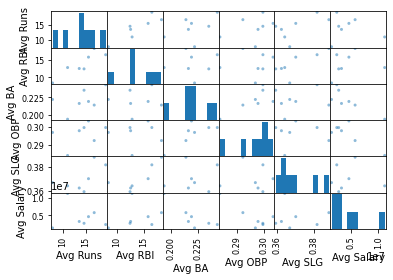

In [4]:
pd.plotting.scatter_matrix(Player_df)

In [5]:
OLS = LinearRegression()

In [6]:
OLS.fit(Player_df[["Avg Runs","Avg RBI","Avg BA", "Avg OBP", "Avg SLG"]],Player_df["Avg Salary"])

LinearRegression()

In [7]:
print("OLS.intercept =",OLS.intercept_)

OLS.intercept = 168201479.96752533


In [8]:
print("OLS.coef_ =", OLS.coef_)

OLS.coef_ = [-4.73966515e+05  1.21404971e+06 -1.45257443e+07 -3.41728126e+08
 -1.87198311e+08]


In [9]:
OLS.score(Player_df[["Avg Runs","Avg RBI","Avg BA", "Avg OBP", "Avg SLG"]],Player_df["Avg Salary"])

0.9412717734402434

In [10]:
yhat = OLS.predict(Player_df[["Avg Runs","Avg RBI","Avg BA", "Avg OBP", "Avg SLG"]])

In [11]:
residuals = Player_df['Avg Salary'] - yhat

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([-943206.66406688, -918827.94512537, -506522.38643661,
          103104.02102056,  712008.96920636,  769695.01421759,
          783748.99118456])),
 (821914.6676595102, 2.9802322387695312e-08, 0.9348656793156276))

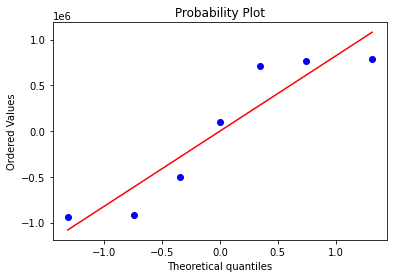

In [12]:
probplot(residuals,plot=plt)

Text(0.5, 0, 'Predicted Salary')

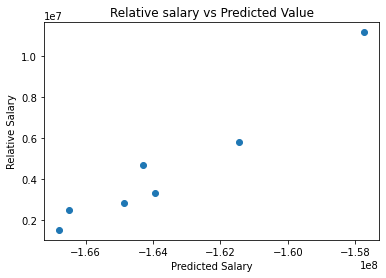

In [26]:
plt.figure()
plt.scatter([-4.73966515e+05 * Player_df['Avg Runs'] + 1.21404971e+06 * Player_df['Avg RBI'] -1.45257443e+07 * Player_df['Avg BA']-3.41728126e+08 * Player_df['Avg OBP']
 -1.87198311e+08* Player_df['Avg SLG']], Player_df["Avg Salary"])
plt.title("Relative salary vs Predicted Value")
plt.ylabel("Relative Salary")
plt.xlabel("Predicted Salary")